<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Análisis y Procesamiento de Señales

# Trabajo Práctico Nº0: GENERADOR DE SEÑALES

## Introducción
El objetivo de este trabajo es diseñar un generador de señales que utilizaremos en las primeras simulaciones. 
La primera tarea consiste en programar una función que genere **señales senoidales** y que permita parametrizar:

- Amplitud máxima (V)
- Valor medio (V)
- Frecuencia (Hz)
- Fase (rad)
- Cantidad de muestras digitalizadas por el ADC (# muestras)
- Frecuencia de muestreo del ADC (Hz)

La función deberá permitir la llamada de la siguiente forma:
```python
tt, xx = mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=N, fs=fs)
```
#### **Bonus**: 
implementar alguna otra señal propia de un generador de señales

## CODIGO REALIZADO:

Para la ralización del codigo se implementaron las fuciones trigonometicas y matematicas de la biblioteca Numpy. Así como tambien el conocimiento adquirido en analisis matematico y/o algebra. 

Para la generacion de la señal senoidal aprovecharemos para utilizar la funcion numpy.sin() que nos devoverá el seno de cada elemento pasado almacenandolo en un vector.

A su vez para la generacion de la señal cuadrática aprovecharemos las funciones numpy.sin() en combinacion de la funcion numpy.sign() donde la primera nos retornará valores entre -1 y +1 que seran evaluados por la segunda segun donde: 

    - si el valor es mayor que cero --> retorna +1
    - si el valor es menor que cero --> retorna -1
    - si el valor es igual que cero --> retorna 0

De esta manera el valor final retornado es almacenado construyendo una variable que constará con estos tres posibles valores.

Para la generacion de la funcion triangular fue un poco más dificil de escudriñar dado que en mi caso personal no recordaba la siguiente identidad trigonometrica: 

\begin{equation}
triangular(t) = \frac{\pi}{2} \, \arcsin\!\big(\sin(2\pi f t)\big)
\end{equation}

Donde el seno retornará valores entre -1 y 1 y el arcoseno valores entre $- \frac{\pi}{2} $ y $\frac{\pi}{2} $. Entonces, si aplicamos 
arcsin(sin(x)) lo que ocurre es que cada vez que el seno supera esos límites, el resultado se pliega y refleja, generando una forma de diente de sierra simétrico. Finalmente, al multiplicar por el factor $\frac{2}{\pi} $ para normalizar el resultado para que la señal triangular oscile entre -1 y 1. 

### DEFINICION DE FUNCION: 

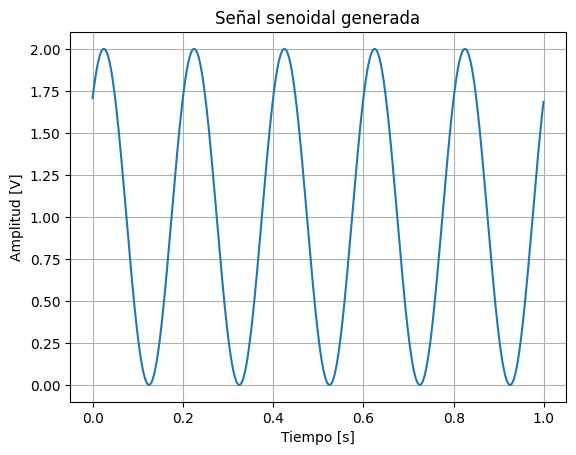

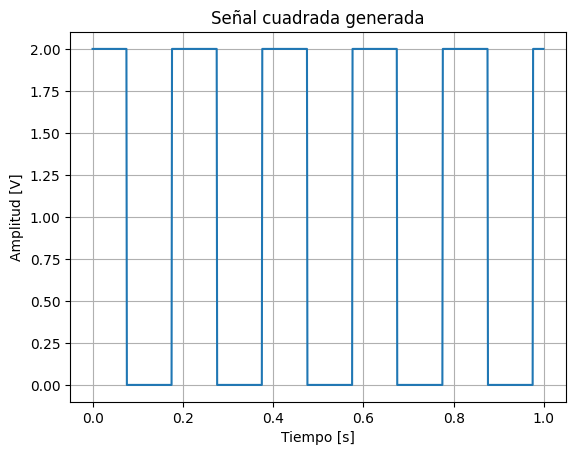

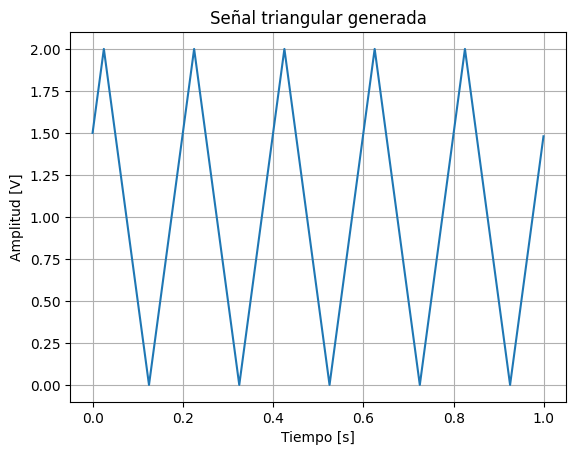

In [8]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Spyder(Phyton 3.10)

@author: Ariel Hipolito

Descripción:
------------
En este primer trabajo comenzaremos por diseñar un generador de señales que 
utilizaremos en las primeras simulaciones que hagamos. La primer tarea 
consistirá en programar una función que genere señales senoidales y que permita 
parametrizar:

 - la amplitud máxima de la senoidal (volts)
 - su valor medio (volts)
 - la frecuencia (Hz)
 - la fase (radianes)
 - la cantidad de muestras digitalizada por el ADC (# muestras)
 - la frecuencia de muestreo del ADC.

es decir que la función que uds armen debería admitir se llamada de la 
siguiente manera:
    
    tt, xx = mi_funcion_sen( vmax = 1, dc = 0, ff = 1, ph=0, nn = N, fs = fs)

BONUS: 
    
    Implementar alguna otra señal propia de un generador de señales. 

"""

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pdsmodulos as pds

#%% VARIABLES GLOBALES:
    
N = 1000   # cantidad de muestras
fs = N # frecuencia de muestreo (Hz)
ff = 5

#%% DEFINICION DE FUNCION:
"""
    Parámetros:
        vmax: amplitud máxima (Volts)
        dc: valor medio (Volts)
        ff: frecuencia (Hz)
        ph: fase (radianes)
        nn: cantidad de muestras
        fs: frecuencia de muestreo (Hz)
"""
# SENOIDAL: 
"""
    Generador de señal senoidal.
    
    Retorna:
        tt: vector de tiempo
        xx: señal senoidal
"""
    
def mi_funcion_sen(vmax=1, dc=0, ff=1, ph=0, nn=N , fs=fs):

    # grilla de sampleo temporal
    tt = np.arange(0, nn) / fs

    xx = vmax * np.sin(tt*2*np.pi*ff + ph) + dc

    return tt,xx

# BONUS:
# CUADRADA:
"""
    Generador de señal cuadrada.
    
    Retorna:
        tt: vector de tiempo
        xx: señal cuadrada
          
    NOTA: la funcion np.sign() devuelve el elemento es mayor que cero, 
    devuelve 1; si es menor que cero, devuelve -1; y si el elemento es cero, 
    devuelve 0. 
"""
def mi_funcion_cuad(vmax=1, dc=0, ff=1, ph=0, nn=N, fs=fs):

    tt = np.arange(0, nn)/fs
    xx = dc + vmax * np.sign(np.sin(2 * np.pi * ff * tt + ph))
    return tt, xx

# TRIANGULAR:
"""
    Generador de señal triangular.
    
    Retorna:
        tt: vector de tiempo
        xx: señal triangular
        
    NOTA: 
    identidad trigonometrica de la onda triangular: tri(t) = π/2 * arcsin(sin(t))
    
    sin(x): oscila entre [-1, 1].

    arcsin(sin(x)): "dobla" esa onda, porque el arcsin siempre devuelve 
    valores en [-π/2, π/2].

    Ese doblado da justamente la forma de triángulo.

    Al multiplicar por 2/π, lo normalizamos para que vaya de -1 a +1.

    Después se escala con vmax y se le suma dc para darle amplitud y offset
    """
def mi_funcion_trian(vmax=1, dc=0, ff=1, ph=0, nn=N, fs=fs):

    tt = np.arange(0, nn) / fs
    xx = dc + (2*vmax/np.pi) * np.arcsin(np.sin(2 * np.pi * ff * tt + ph))
    return tt, xx

#%% TESTEO DE FUNCION: 
    
tt_sin, sin = mi_funcion_sen(vmax=1, dc=1, ff=ff, ph=np.pi/4, nn=N, fs=fs)

# Armo grafico senoidal
plt.figure()
plt.plot(tt_sin, sin)
plt.title("Señal senoidal generada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

tt_sq, sq = mi_funcion_cuad(vmax=1, dc=1, ff=ff, ph=np.pi/4, nn=N, fs=fs)

# Armo grafico cuadrada
plt.figure()
plt.plot(tt_sq, sq)
plt.title("Señal cuadrada generada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

tt_tri, tria = mi_funcion_trian(vmax=1, dc=1, ff=ff, ph=np.pi/4, nn=N, fs=fs)

# Armo grafico triangular 
plt.figure()
plt.plot(tt_tri, tria)
plt.title("Señal triangular generada")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [V]")
plt.grid(True)

# Muestro todos los graficos 
plt.show()

Pudimos concluir exitosamente con los requerimientos mínimos de la actividad, donde se pedía la generación de una señal senoidal.  
Además, implementamos la generación de dos señales adicionales: la cuadrada y la triangular.  

En los gráficos se puede observar cómo, utilizando los mismos parámetros de muestreo y tiempo, obtenemos tres formas de onda distintas. 

---

## Aliasing Digital 

Hasta ahora generamos señales senoidales, cuadradas y triangulares, y observamos sus espectros.  
Sin embargo, al trabajar en tiempo discreto aparece un fenómeno importante: el **aliasing**.

El **aliasing digital** ó **alias digital** es un fenómeno que ocurre cuando se digitaliza una señal analógica que contiene componentes de frecuencia superiores a la **frecuencia de Nyquist**, definida como la mitad de la frecuencia de muestreo:

\begin{equation}
f_{\text{Nyquist}} = \frac{f_s}{2}
\end{equation}

Donde $f_s$ es la frecuencia de muestreo siendo en nuestro ejemplo $f_s = 1000$ por lo que $f_{\text{Nyquist}} = 500$. 

A continuación, realizaremos algunas variaciones en la **frecuencia** para evaluar el comportamiento de este fenomeno y para ello, nos centraremos en la señal **senoidal**, que constituye la base de todas las demás señales generadas como se pudo observar en el desarrollo de nuestro generador de funciones.

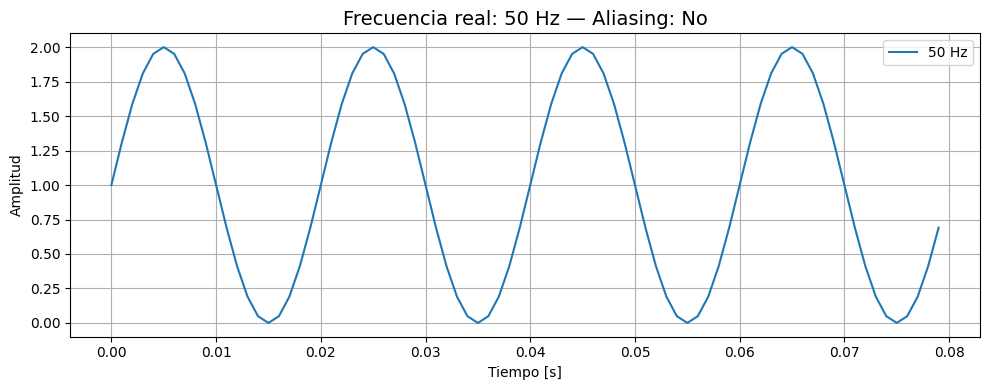

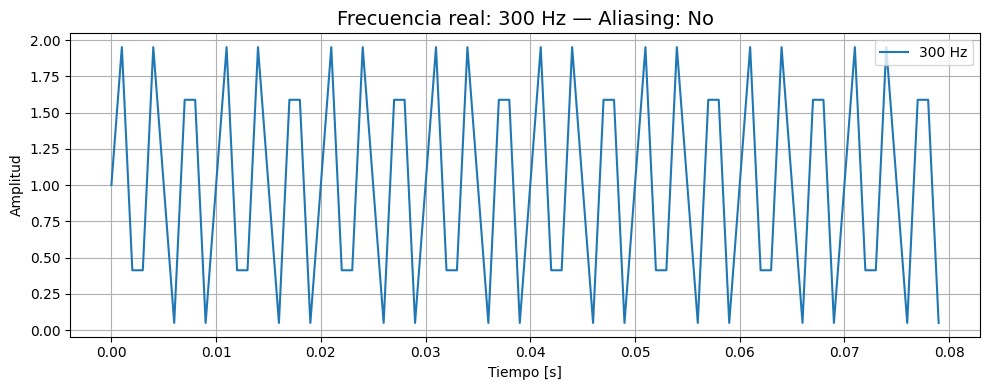

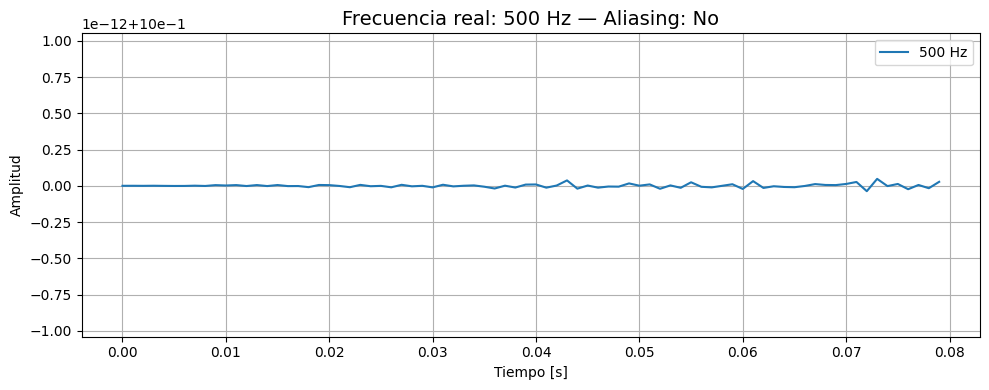

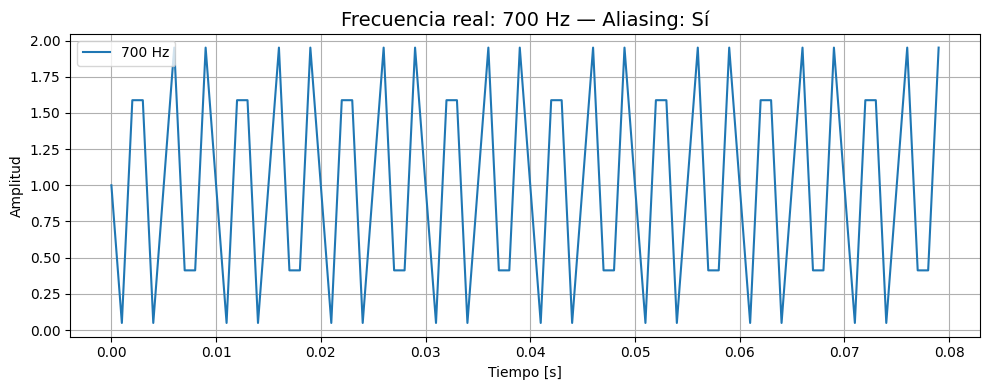

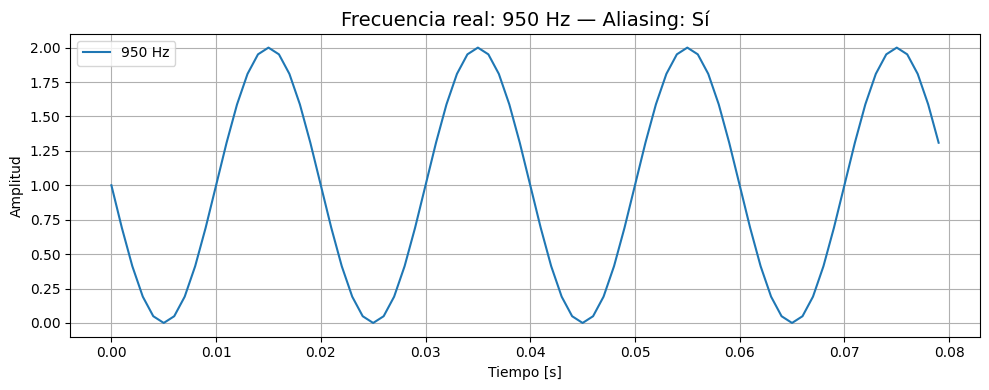

In [38]:
frecuencias = [50, 300, 500, 700, 950]  # Frecuencias a analizar
f_nyquist = fs / 2

# Graficar cada señal
for f in frecuencias:
    tt_p, sin_p = mi_funcion_sen(vmax=1, dc=1, ff=f, ph=0, nn=N, fs=fs)
    aliasing = "Sí" if f > f_nyquist else "No"

    mask = tt_p < 0.08
    plt.figure(figsize=(10, 4))
    plt.plot(tt_p[mask], sin_p[mask], label=f"{f} Hz")
    plt.title(f"Frecuencia real: {f} Hz — Aliasing: {aliasing}", fontsize=14)
    plt.xlabel("Tiempo [s]")
    plt.ylabel("Amplitud")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

### 50 Hz

- Muy por debajo de Nyquist.

- La señal se ve suave, con muchos puntos por ciclo.

- Representación practicamente perfecta.

### 300 Hz

- Más cerca de Nyquist.

- Menos puntos por ciclo → la forma empieza a parecer más angulosa.

- Aún sin aliasing.

### 500 Hz

- Justo en Nyquist.

- Solo dos puntos por ciclo → la señal parece  practicamente una línea recta.

- No hay aliasing, pero la forma es irreconocible.

### 700 Hz

- Por encima de Nyquist.

- Hay presencia de alias en la señal y esta aparece como una frecuencia más baja.

- Se ve similar a la de 300 Hz, pero invertida.

### 950 Hz

- Mucho más allá de Nyquist.

- El aliasing es más extremo.

- La señal parece una frecuencia aún más baja, completamente distinta de la original.

- Se ve similar a la de 50 Hz, pero invertida.

  
### ¿Qué sucede?

Cuando una señal contiene frecuencias mayores a $f_{\text{Nyquist}}$, el sistema de muestreo no puede representarlas correctamente. En lugar de desaparecer, estas frecuencias **se reflejan** dentro del rango permitido, apareciendo como si fueran frecuencias más bajas. Este efecto se conoce como **aliasing**, y puede provocar distorsiones graves en el análisis digital de señales.

### Consecuencias

- Distorsión en la reconstrucción de la señal original.
- Pérdida de información.
- Aparición de componentes espectrales no presentes en la señal original.

En el gráfico correspondiente se puede ver cómo una señal de alta frecuencia se “disfraza” como una señal de frecuencia más baja.

## Conclusión

Se evidencia de forma práctica el fenómeno de **aliasing** en el muestreo digital de señales.  
A través de la generación y comparación de señales senoidales con distintas frecuencias, se observa que:

- Cuando la frecuencia de la señal está **muy por debajo** de la frecuencia de Nyquist ($f_s/2$), la representación digital es fiel y suave.
- Al **acercarse a Nyquist**, disminuye el número de muestras por ciclo, la forma de onda se vuelve más angulosa y menos reconocible.
- En **Nyquist exacto**, la señal queda reducida a dos puntos por ciclo, perdiendo completamente su forma original.
- Al **superar Nyquist**, la señal se "aliasa": aparece como una frecuencia más baja dentro del rango permitido, pudiendo incluso invertirse en fase.
- Este efecto provoca que señales de alta frecuencia se confundan con señales de baja frecuencia, generando errores graves en el análisis.
- Lo mismo ocurrirá para señales cuadradas y triangulares de nuestro generador dado que parten de una senoidal.
  
Para evitar aliasing y preservar la información original es fundamental:
1. Usar una frecuencia de muestreo al menos el doble de la frecuencia máxima presente en la señal.
2. Aplicar un **filtro antialiasing** previo al muestreo para eliminar componentes por encima de Nyquist.

Comprender y evidenciar este fenómeno es esencial para diseñar sistemas de adquisición y procesamiento digital de señales confiables y precisos.
